# SOMEvaluation

Try using SOMs as an alternative method to cluster time-series metabolomic data

Using MiniSOM as widely used (citations) and recently maintained + code easy to understand and plenty of examples

See https://github.com/JustGlowing/minisom

Import packages

In [1]:
import numpy as np
import pandas as pd

Import MiniSOM ...

In [2]:
from minisom import MiniSom

Load dataset

In [3]:
data = pd.read_csv('./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master.csv')
# Keep a copy just in case
data_copy = data 
print(data.head(5), "\n")
metabolites = data['BioCyC Name']
print(metabolites)
data.drop(data.columns[[0, 1]], axis=1, inplace=True) # Delete all metabolite names so just raw data

     BioCyC Name    Metabolite   0.5     1     2     4    12    24    48  \
0       PYRUVATE      Pyruvate  1.19  1.32  0.86  0.68  0.54  1.84  3.23   
1        LACTATE       Lactate  0.87  1.26  0.98  0.67  0.53  4.94  3.67   
2  ETHANOL-AMINE  Ethanolamine  1.31  1.45  1.18  1.22  0.52  0.59  0.31   
3       GLYCEROL      Glycerol  1.61  0.72  0.68  1.91  1.42  3.30  0.90   
4            SUC     Succinate  0.75  1.08  0.80  0.55  0.39  0.21  0.87   

      72  
0   3.63  
1  12.75  
2   0.26  
3   1.40  
4   1.62   

0             PYRUVATE
1              LACTATE
2        ETHANOL-AMINE
3             GLYCEROL
4                  SUC
5            GLYCERATE
6                  FUM
7           CADAVERINE
8                  MAL
9     4-AMINO-BUTYRATE
10                 CYS
11     2-KETOGLUTARATE
12       CIS-ACONITATE
13          PUTRESCINE
14           SHIKIMATE
15                 CIT
16                 FRU
17             GLUCOSE
18                 LYS
19                 TYR
20           GL

Data standardization

In [4]:
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values
print(data)

[[ 6.71842503e-01  3.15336857e-01 -4.82794734e-01 -1.00712844e+00
  -1.11087675e+00  1.14998841e+00  3.30422643e+00  9.02926971e-01]
 [-4.61136114e-01  2.00584096e-01 -2.70330504e-01 -1.04334973e+00
  -1.15688276e+00  4.83447359e+00  3.96742452e+00  4.74872322e+00]
 [ 1.09670948e+00  5.63967841e-01  8.37765459e-02  9.48821007e-01
  -1.20288877e+00 -3.35691097e-01 -1.09699729e+00 -5.18162214e-01]
 [ 2.15887694e+00 -8.32190759e-01 -8.01491079e-01  3.44808975e+00
   2.93765186e+00  2.88526208e+00 -2.07708938e-01 -3.74376828e-02]
 [-8.86003095e-01 -1.43674189e-01 -5.89026849e-01 -1.47800516e+00
  -1.80096686e+00 -7.87337668e-01 -2.52926989e-01  5.53337180e-02]
 [ 6.01031339e-01 -6.40936157e-01 -9.78544604e-01  4.32888541e-02
   1.83350769e+00  8.64737946e-01  4.70561841e-01 -3.32619413e-01]
 [-6.38164022e-01 -4.49681554e-01 -7.30669669e-01 -9.34685871e-01
  -1.15688276e+00 -7.63566795e-01 -1.92636254e-01  3.42081684e-01]
 [ 2.11569940e-01 -2.96677872e-01 -1.10982331e-01 -2.46481435e-01
   

Initialise ...

In [5]:
# Initialization and training
som_shape = (20, 20)
#som.random_weights_init(data)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(data)
#print(data)

Train ...

In [6]:
som.train_batch(data, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.15860393087469413


som=(20,20) with 1000 iterations takes <1s

Identify clusters ...

In [7]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

Plot ...

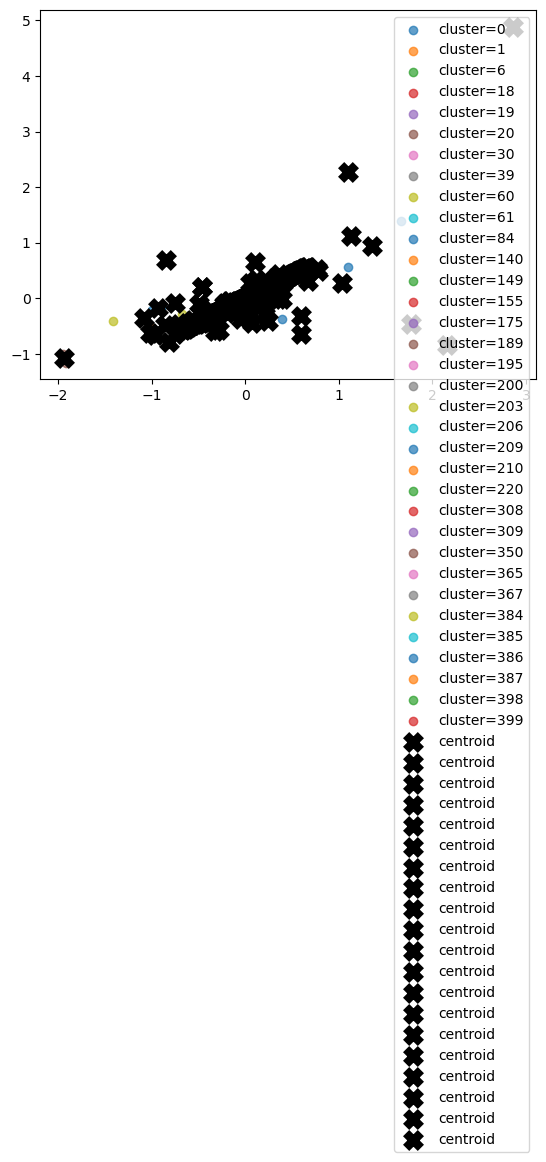

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=20, linewidths=15, color='k', label='centroid')
plt.legend();

som=(1,3) - Looks similar to K-means, PCA, etc. - Silhouette score = 0.36926102027773555

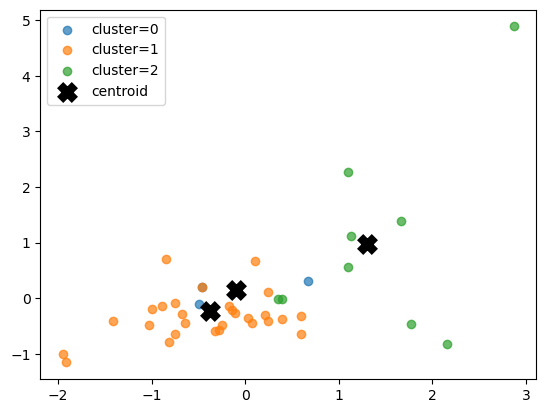

som=(1,4) - Looks similar to K-Means, PCA, etc - Silhouette score = 0.28733558395862197

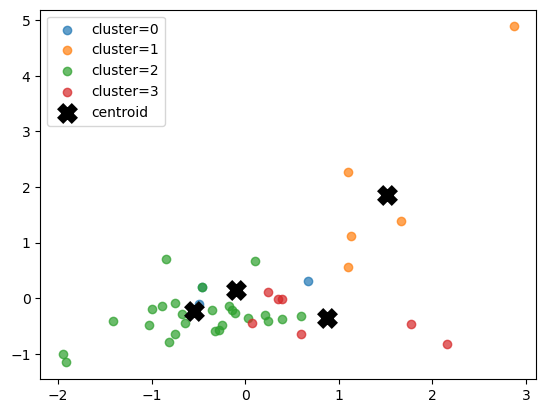

In [9]:
print(cluster_index)

[ 18  19 386 399   0 175   1 210   6 149 308 155 398  60   1 387   0 220
 365 385 200 203 309  39 209 140 206  61  84  30  20  20 189 209  60 384
 350 367 386 195 209]


In [10]:
print(centroid)

[[ 1.56251450e-01  1.36767025e-01  1.71429765e-01  2.95019710e-01
   9.98516292e-02 -7.18402672e-01 -8.16643015e-01 -8.04659500e-01]
 [ 1.88085230e-01  1.63892023e-01  1.96013626e-01  3.08871655e-01
   1.13086071e-01 -6.66779571e-01 -7.61431647e-01 -7.53214922e-01]
 [ 2.19930544e-01  1.91044306e-01  2.20618967e-01  3.22726599e-01
   1.26332660e-01 -6.15156232e-01 -7.06222642e-01 -7.01768040e-01]
 [ 3.16634487e-01  3.74880104e-01  3.68350199e-01  3.53107716e-01
   2.08809801e-01 -5.66095409e-01 -6.68904823e-01 -6.40854843e-01]
 [ 1.09678282e+00  2.26566743e+00  1.85409959e+00  5.50465411e-01
   1.05040932e+00 -5.97156251e-01 -8.85618572e-01 -5.26648892e-01]
 [ 2.86465699e+00  4.88147459e+00  4.43460525e+00  1.05727820e+00
  -9.87322287e-02 -7.27707244e-01 -2.98778484e-01 -5.68656799e-01]
 [ 1.35252945e+00  9.35361685e-01  4.19606383e-01  1.09603414e+00
  -9.12016858e-01 -4.96712202e-01 -9.67665306e-01 -4.51512237e-01]
 [ 3.53691337e-01 -9.34839357e-03  8.26165078e-01  1.02105610e+00
   

Check Silhouette score

In [11]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data, cluster_index, metric='euclidean'))


0.030318680453810476


From Silhouette score som=(1,3) appears optimal at 0.36926102027773555

At som=(20,20) Silhouette score = 0.030318680453810594 which as close to zero means we are on the decision boundary ... not good ...

Plot SOM u-matrices without metabolite names

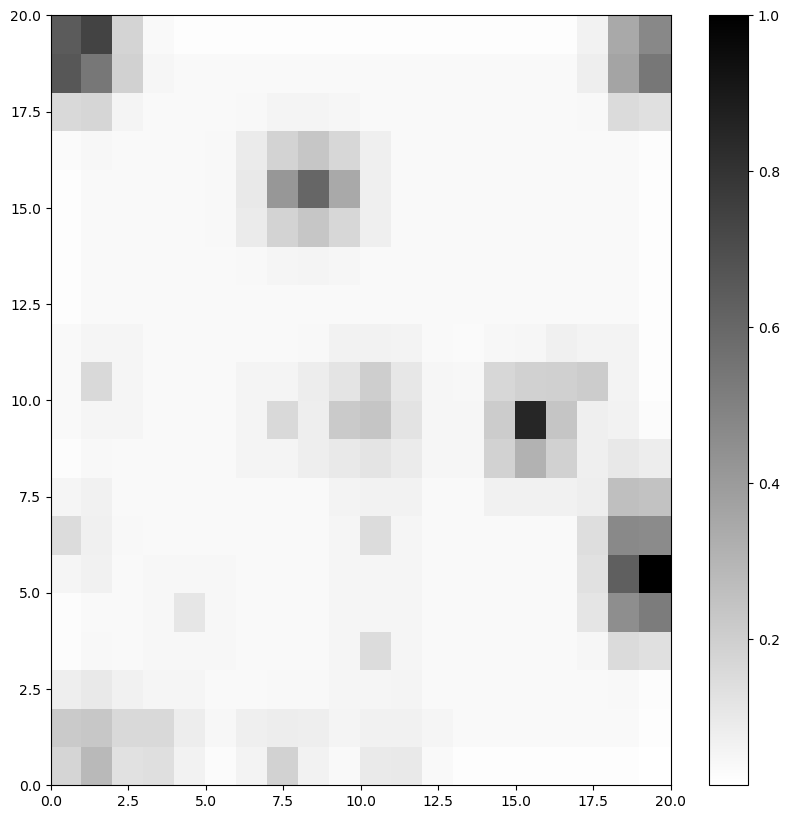

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
target = metabolites
plt.figure(figsize=(10, 10))

plt.pcolor(som.distance_map().T, cmap='binary', alpha=1)  # plotting the distance map as background
plt.colorbar()
plt.show()


Some more SOMs with increasing size ...

som=(10,10) - some seperation appearing ...

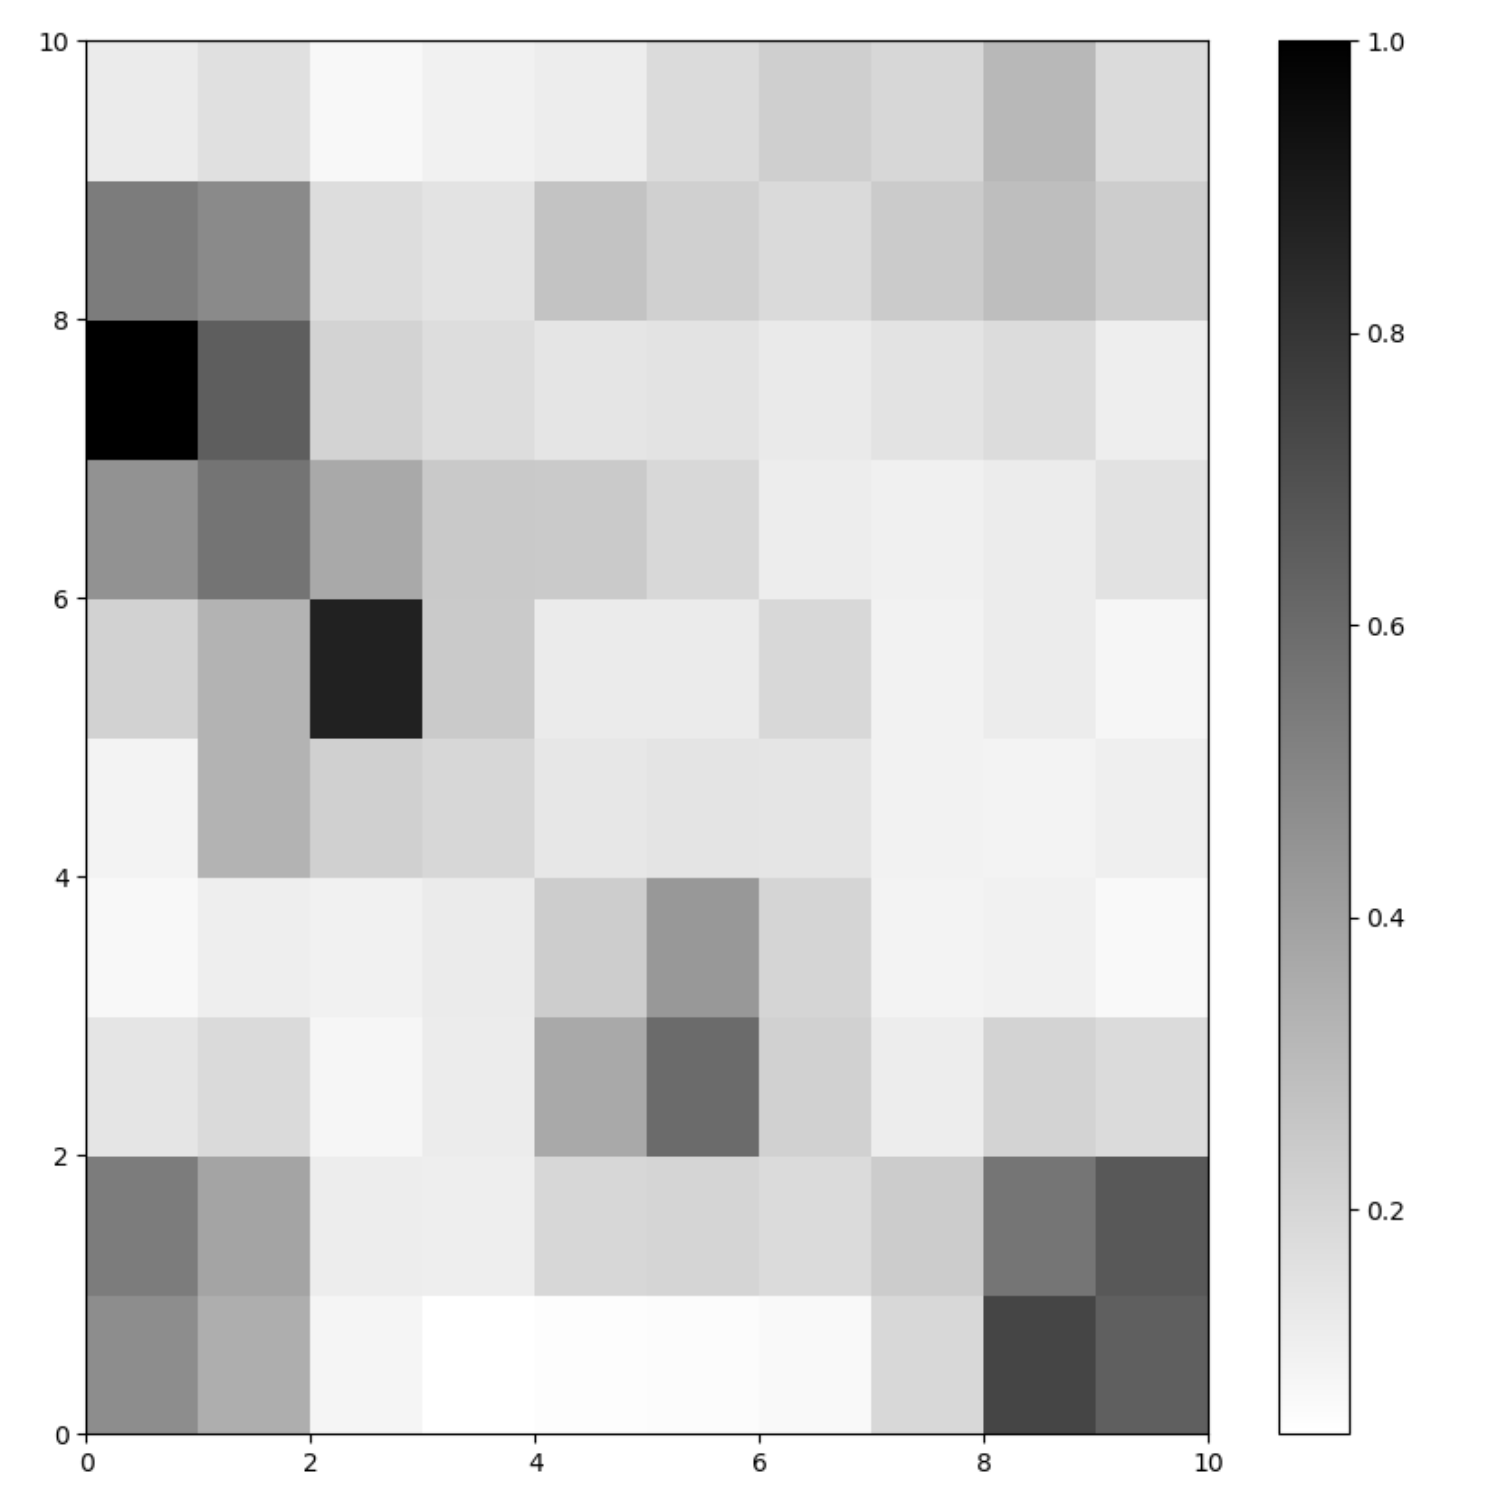

som=(20,20) - looking interesting ... some clear white areas seperating darker clusters

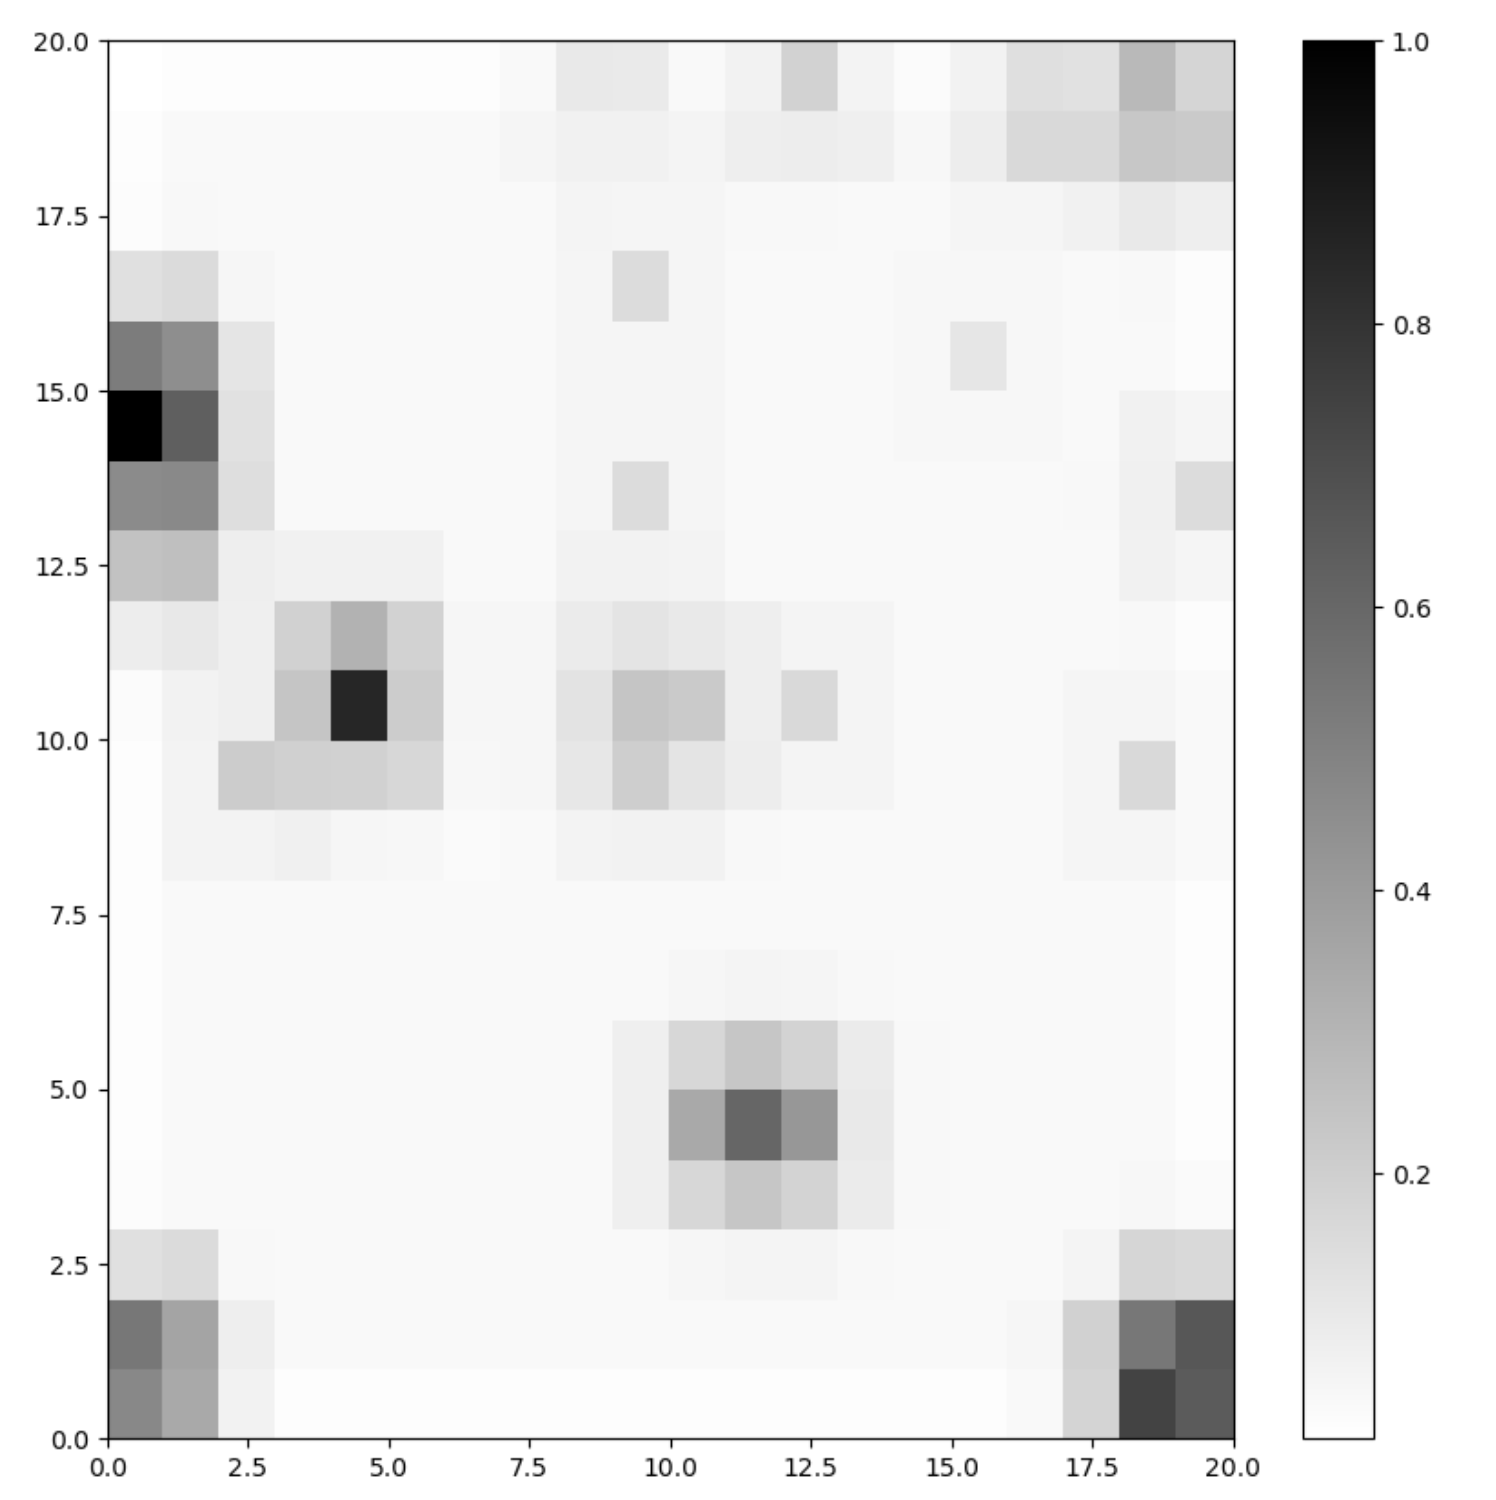

Plot U-matrix with metabolite names

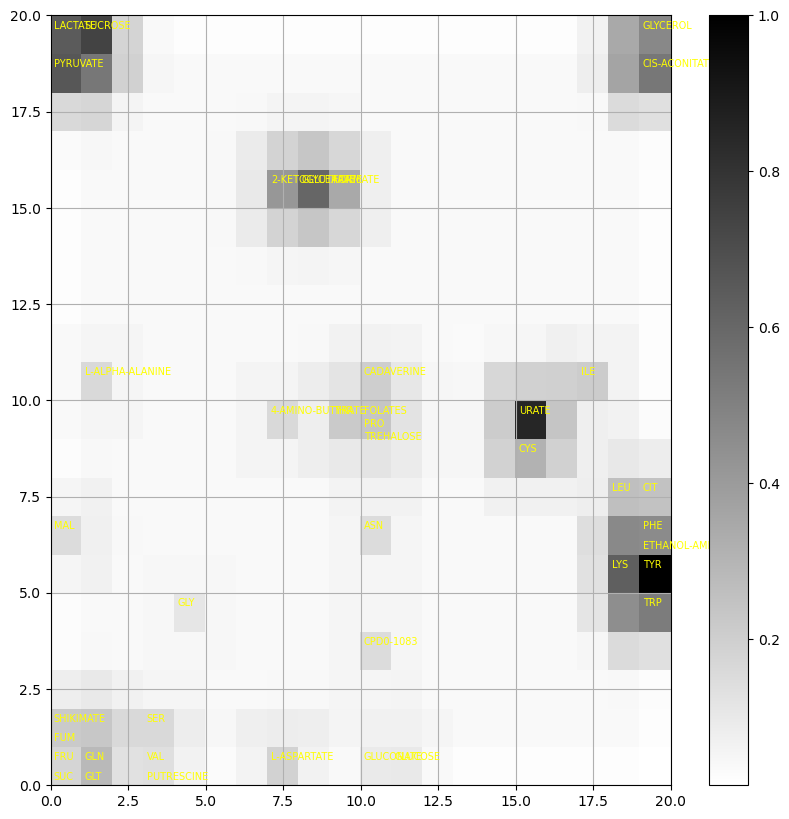

In [13]:
metabolite_map = som.labels_map(data, metabolites)

size=5

plt.figure(figsize=(10, 10))
for p, metabs in metabolite_map.items():
    metabs = list(metabs)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(metabs):
        off_set = (i+1)/len(metabs) - 0.05
        plt.text(x, y+off_set, c, color="yellow", fontsize=7)
plt.pcolor(som.distance_map().T, cmap='binary', alpha=1)
plt.colorbar()
plt.grid()

Can overlay metabolites ... takes less than a second to run on 5 year old iMac ...

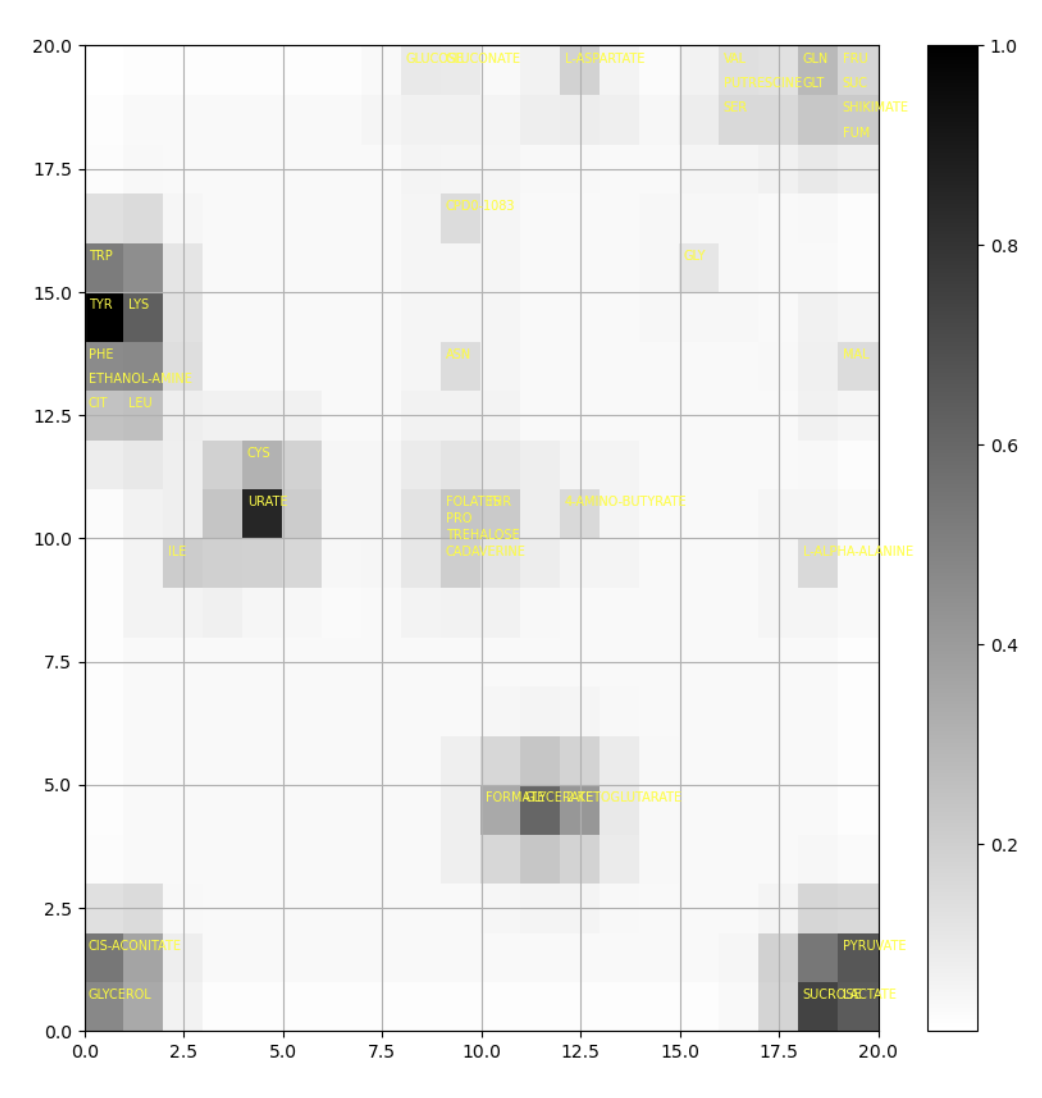

Calculate errors ...

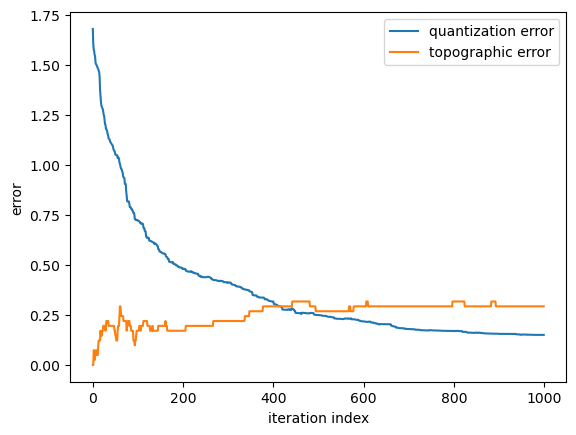

In [14]:
som = MiniSom(20, 20, data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)
som.pca_weights_init(data)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

Manually transcribe cluster contents

In [15]:
# Firat group are black/dark grey - represent strongest similarities
cluster_0 = ['TRP', 'TYR', 'LYS', 'PHE', 'ETHANOL-AMINE', 'CIT', 'LEU']
cluster_1 = ['CYS', 'ILE', 'URATE']
cluster_2 = ['FORMATE', 'GLYCERATE', '2-KETOGLUTARATE']
cluster_3 = ['CIS-ACONITATE', 'GLYCEROL']
cluster_4 = ['PYRUVATE', 'SUCROSE', 'LACTATE']

# Second group are mid/light gray - reduced strength of similariries
cluster_5 = ['VAL', 'PUTRESCINE', 'SER', 'GLN', 'GLT', 'FRU', 'SUC', 'SHIKIMATE', 'FUM']
cluster_6 = ['FOLATES', 'THR', 'PRO', 'TREHALOSE', 'CADAVERINE']
cluster_7 = ['GLUCOSE', 'GLUCONATE']

# Third group of singletons - not convinced these should be treated as clusters
cluster_8 = ['CPD0-1083']
cluster_9 = ['GLY']
cluster_10 = ['ASN']
cluster_11 = ['MAL']
cluster_12 = ['L-ASPARTATE']
cluster_13 = ['4-AMINO-BUTYRATE']
cluster_14 = ['L-ALPHA-ALANINE']

clusters = []

for metab in (range(0, len(metabolites))):
    if metabolites[metab] in cluster_0:
        clusters.append(0)
    if metabolites[metab] in cluster_1:
        clusters.append(1)
    if metabolites[metab] in cluster_2:
        clusters.append(2)
    if metabolites[metab] in cluster_3:
        clusters.append(3)
    if metabolites[metab] in cluster_4:
        clusters.append(4)
    if metabolites[metab] in cluster_5:
        clusters.append(5)
    if metabolites[metab] in cluster_6:
        clusters.append(6)
    if metabolites[metab] in cluster_7:
        clusters.append(7)
    if metabolites[metab] in cluster_8:
        clusters.append(8)
    if metabolites[metab] in cluster_9:
        clusters.append(9)
    if metabolites[metab] in cluster_10:
        clusters.append(10)
    if metabolites[metab] in cluster_11:
        clusters.append(11)
    if metabolites[metab] in cluster_12:
        clusters.append(12)
    if metabolites[metab] in cluster_13:
        clusters.append(13)
    if metabolites[metab] in cluster_14:
        clusters.append(14)

print(clusters)
print(len(clusters))

[4, 4, 0, 3, 5, 2, 5, 6, 11, 13, 1, 2, 3, 5, 5, 0, 5, 7, 0, 0, 7, 8, 1, 4, 6, 12, 10, 5, 9, 14, 5, 5, 6, 6, 5, 0, 1, 0, 0, 2, 6]
41


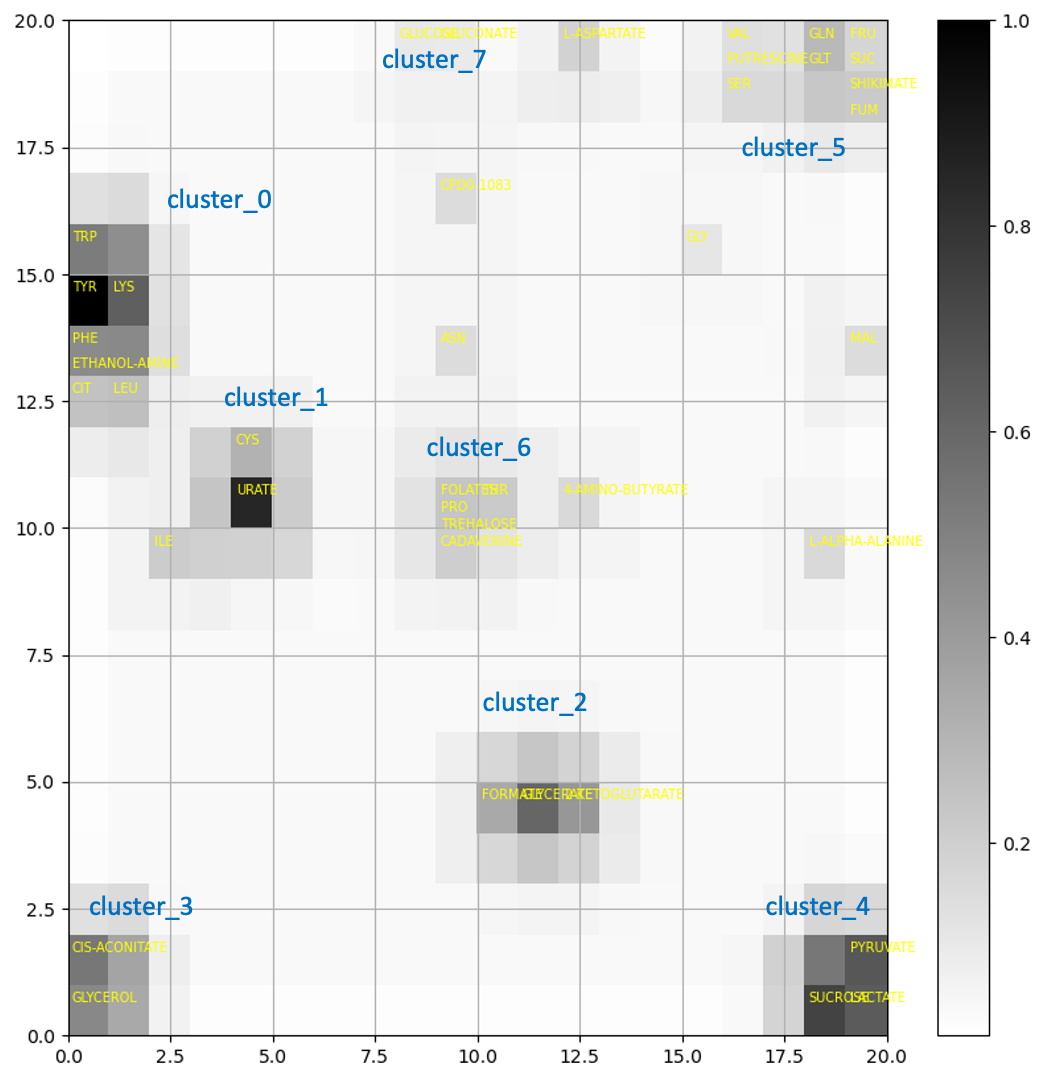

Plot graphs per cluster group

GLUCOSE 17
GLUCONATE 20


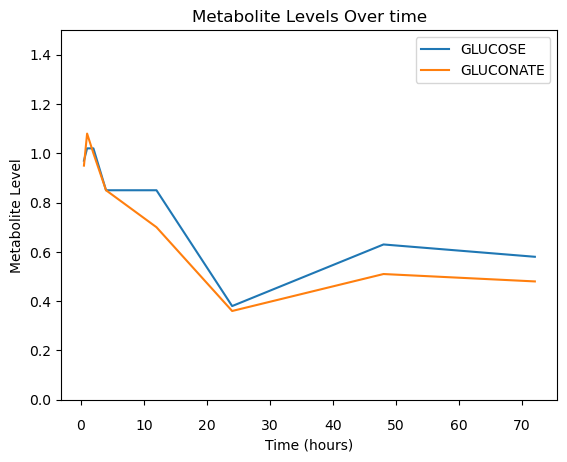

In [16]:
# Manually need to specify cluster group

# Define x axis
row_x = np.array([0.5, 1, 2, 4, 12, 24, 48, 72])

# Convert metabolites to list so can index position
metabolites_list = metabolites.to_list()

# Read original data
plot_data = pd.read_csv('./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master.csv')

plot_data.drop(plot_data.columns[[1]], axis=1, inplace=True) # Delete all metabolite names so just raw data
#print(plot_data.head(5))

ax = plt.axes()

for metab in cluster_7: # THis is where you specify cluster group
    index = metabolites_list.index(metab)
    print(metab, index)
    row_y = np.array(plot_data.iloc[index,1:9])
    leg = plot_data.iloc[index,0]
    plt.plot(row_x, row_y, label=leg)

ax.tick_params(axis='x', which='major', pad=10)
plt.title("Metabolite Levels Over time")
plt.xlabel("Time (hours)")
plt.ylabel("Metabolite Level")
plt.ylim([0, 1.5])
plt.legend()
plt.show()

In rough order from u-matrix ... solid black, dark gray, lighter grey, etc ... show strength of similarity ...

Cluster 0

Some diversion after 48 hours ... black on SOM u-matrix ...

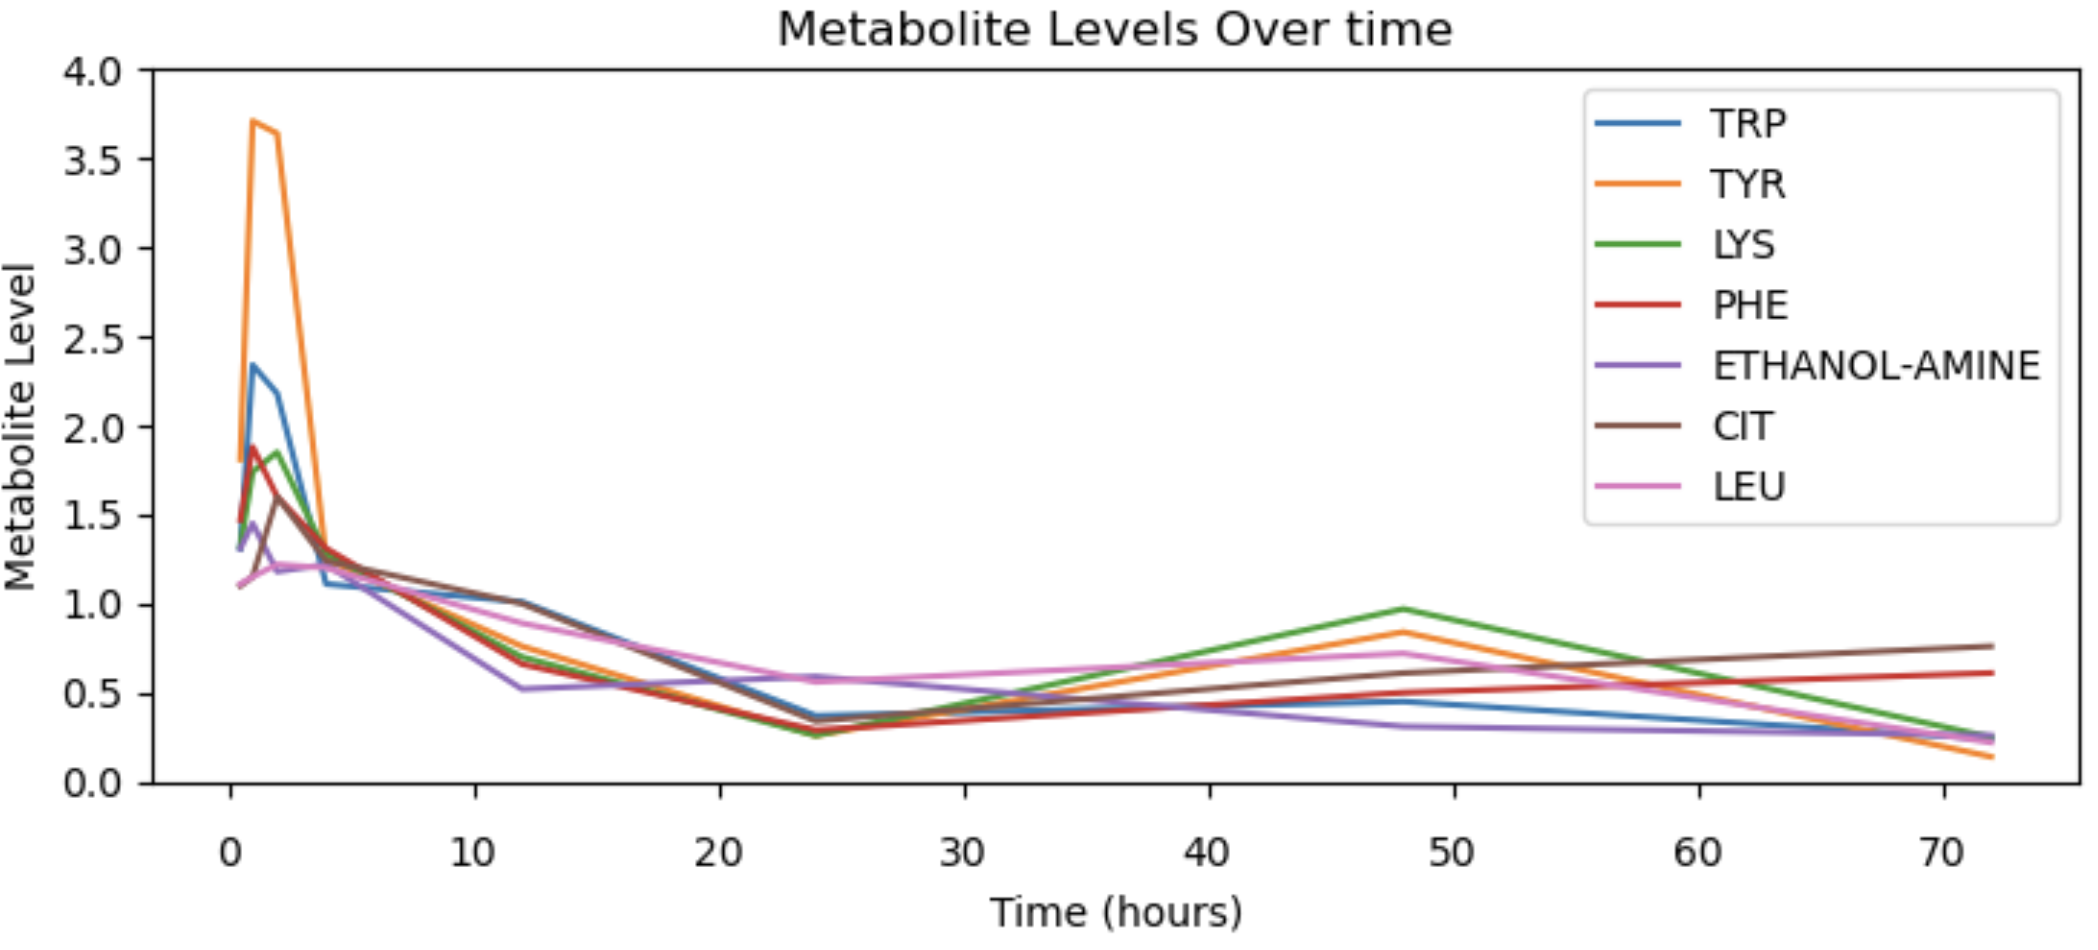

Cluster 1

Looks OK ... black on SOM u-matrix ...

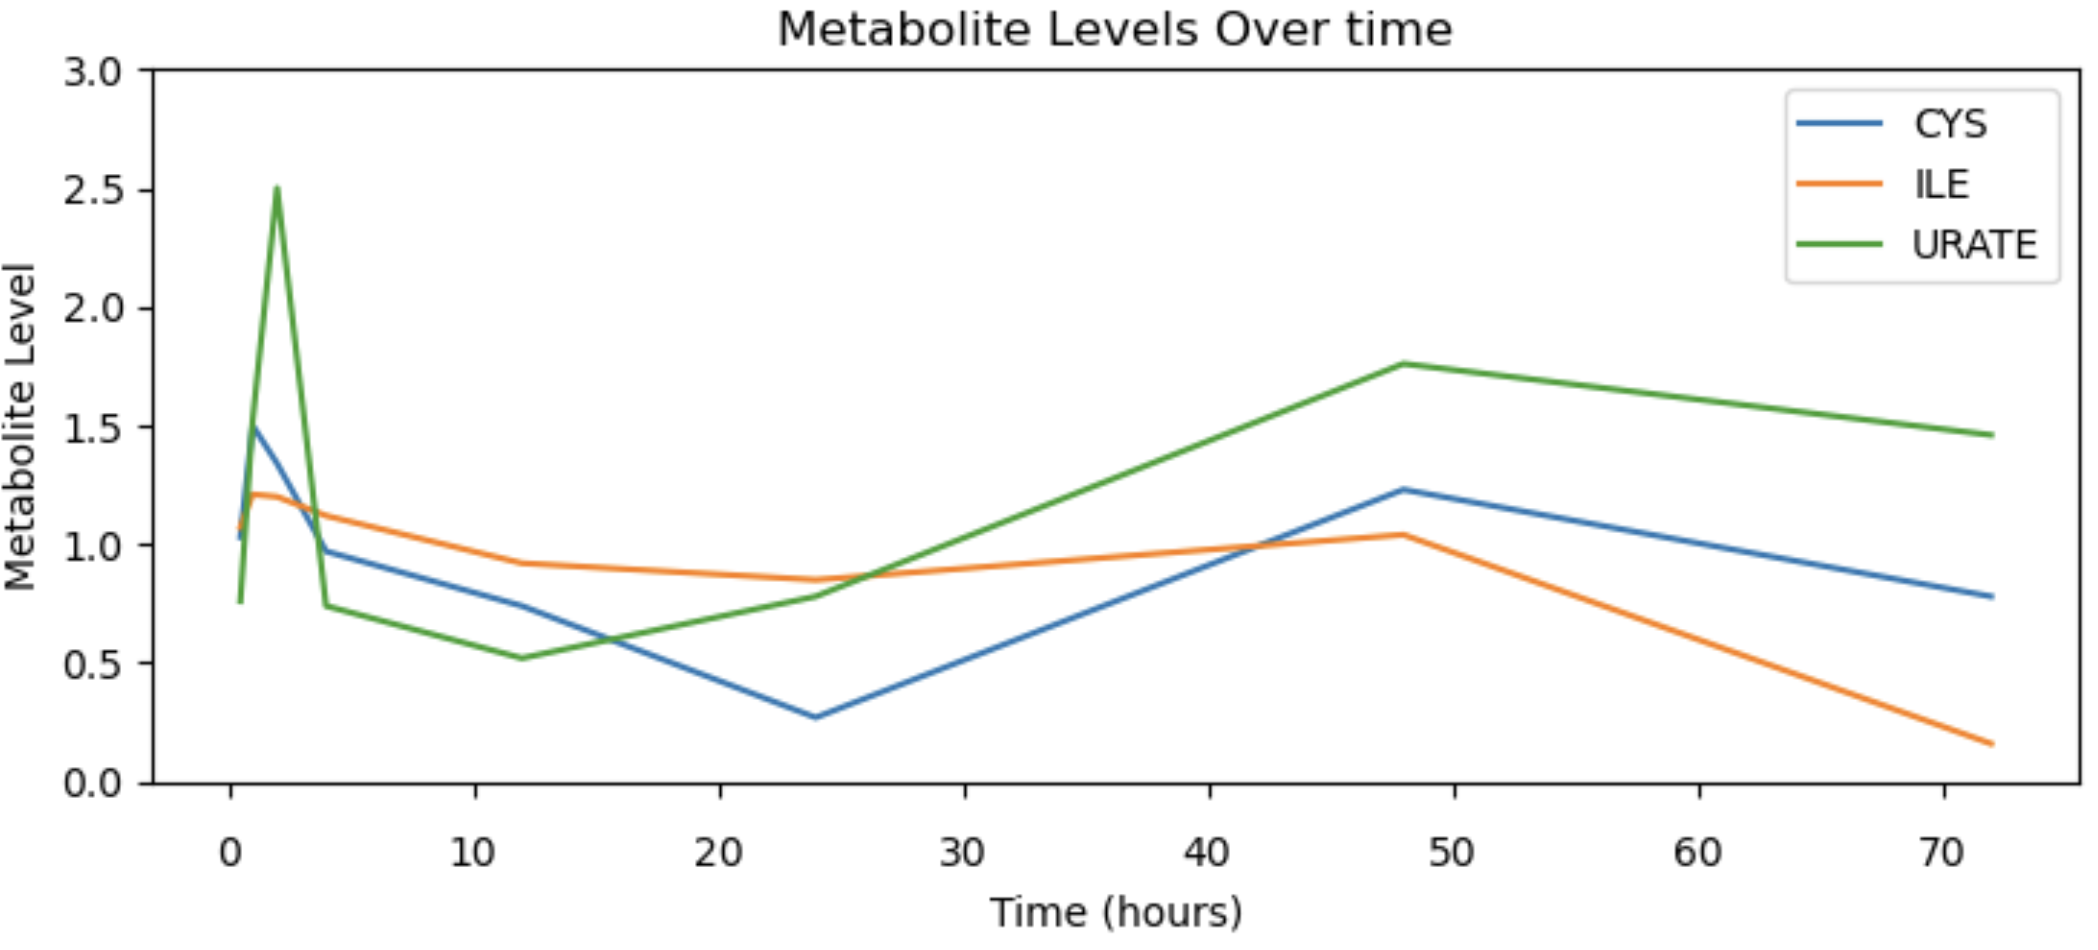

Cluster 2

Starts off OK, but inconsistencies between 12 and 48 hours ... on u-matrix  grey rather than black so appropriate ...

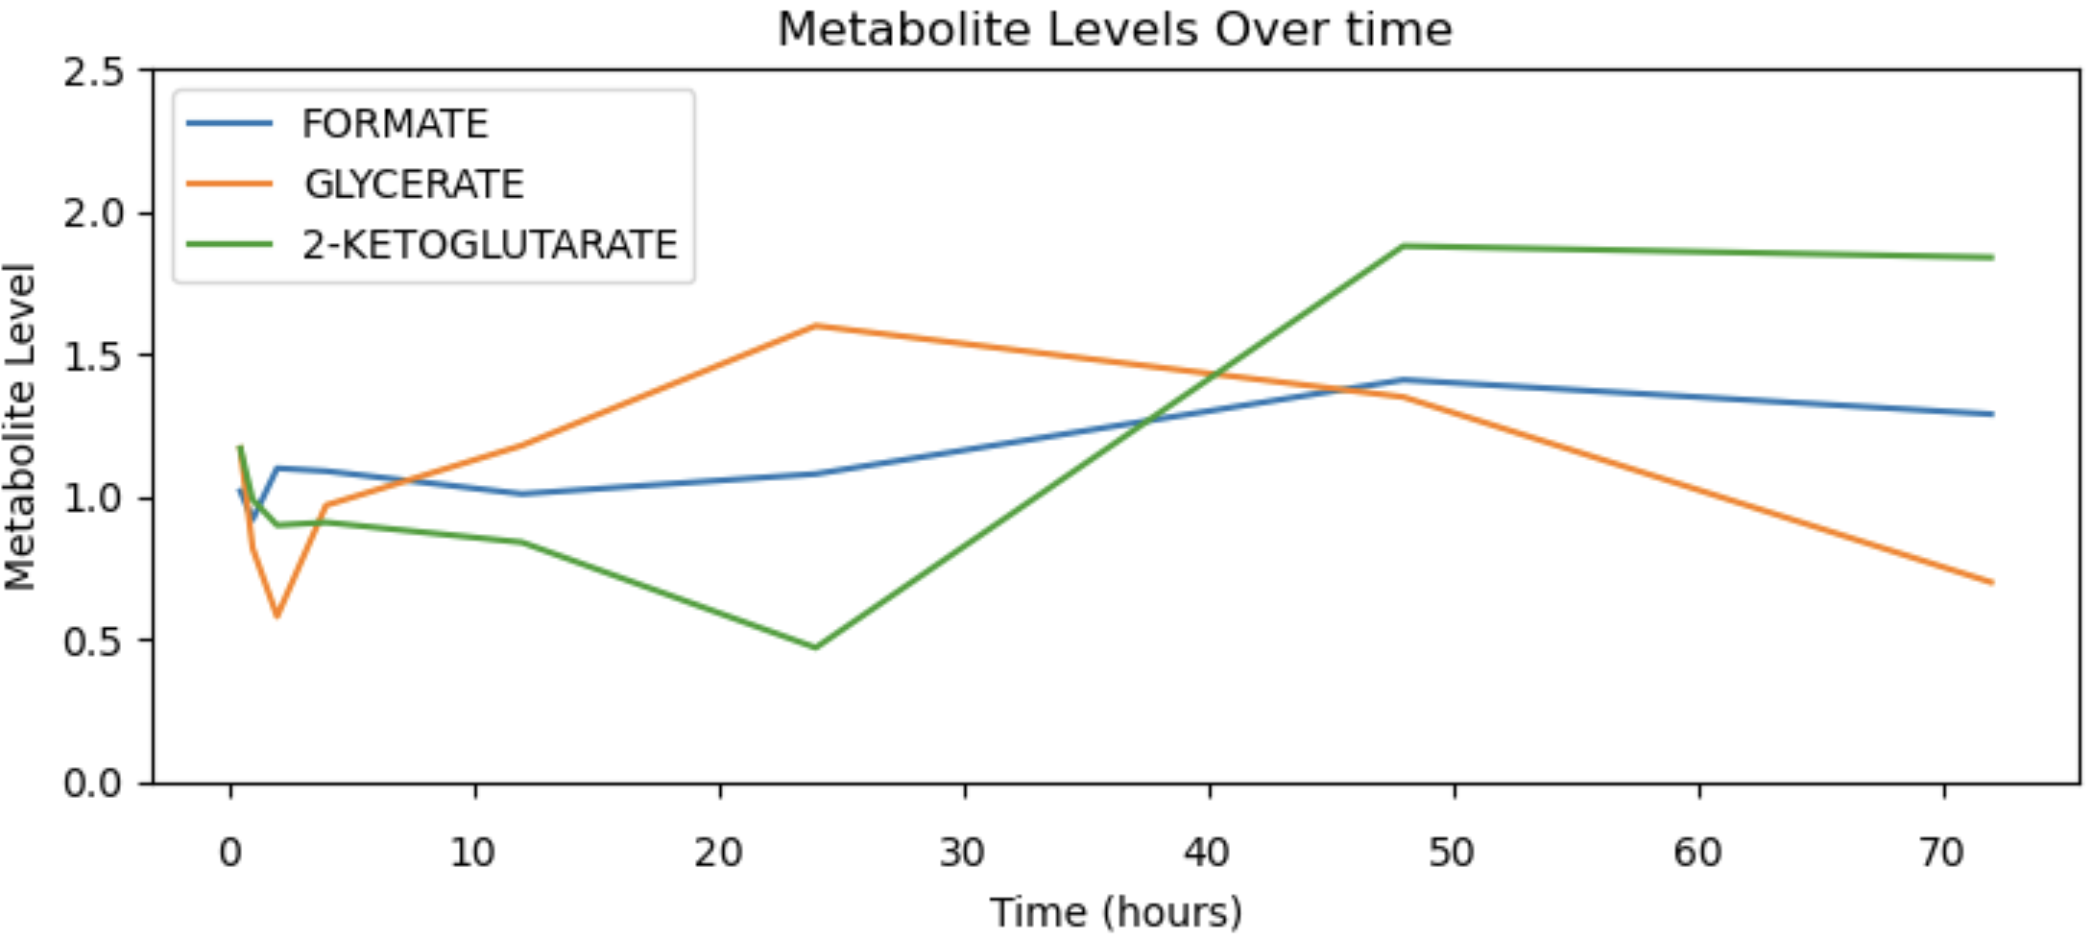

Cluster 3

Looks good ... except between 12 and 48 hours ... on u-matrix grey rather than black so appropriate ...

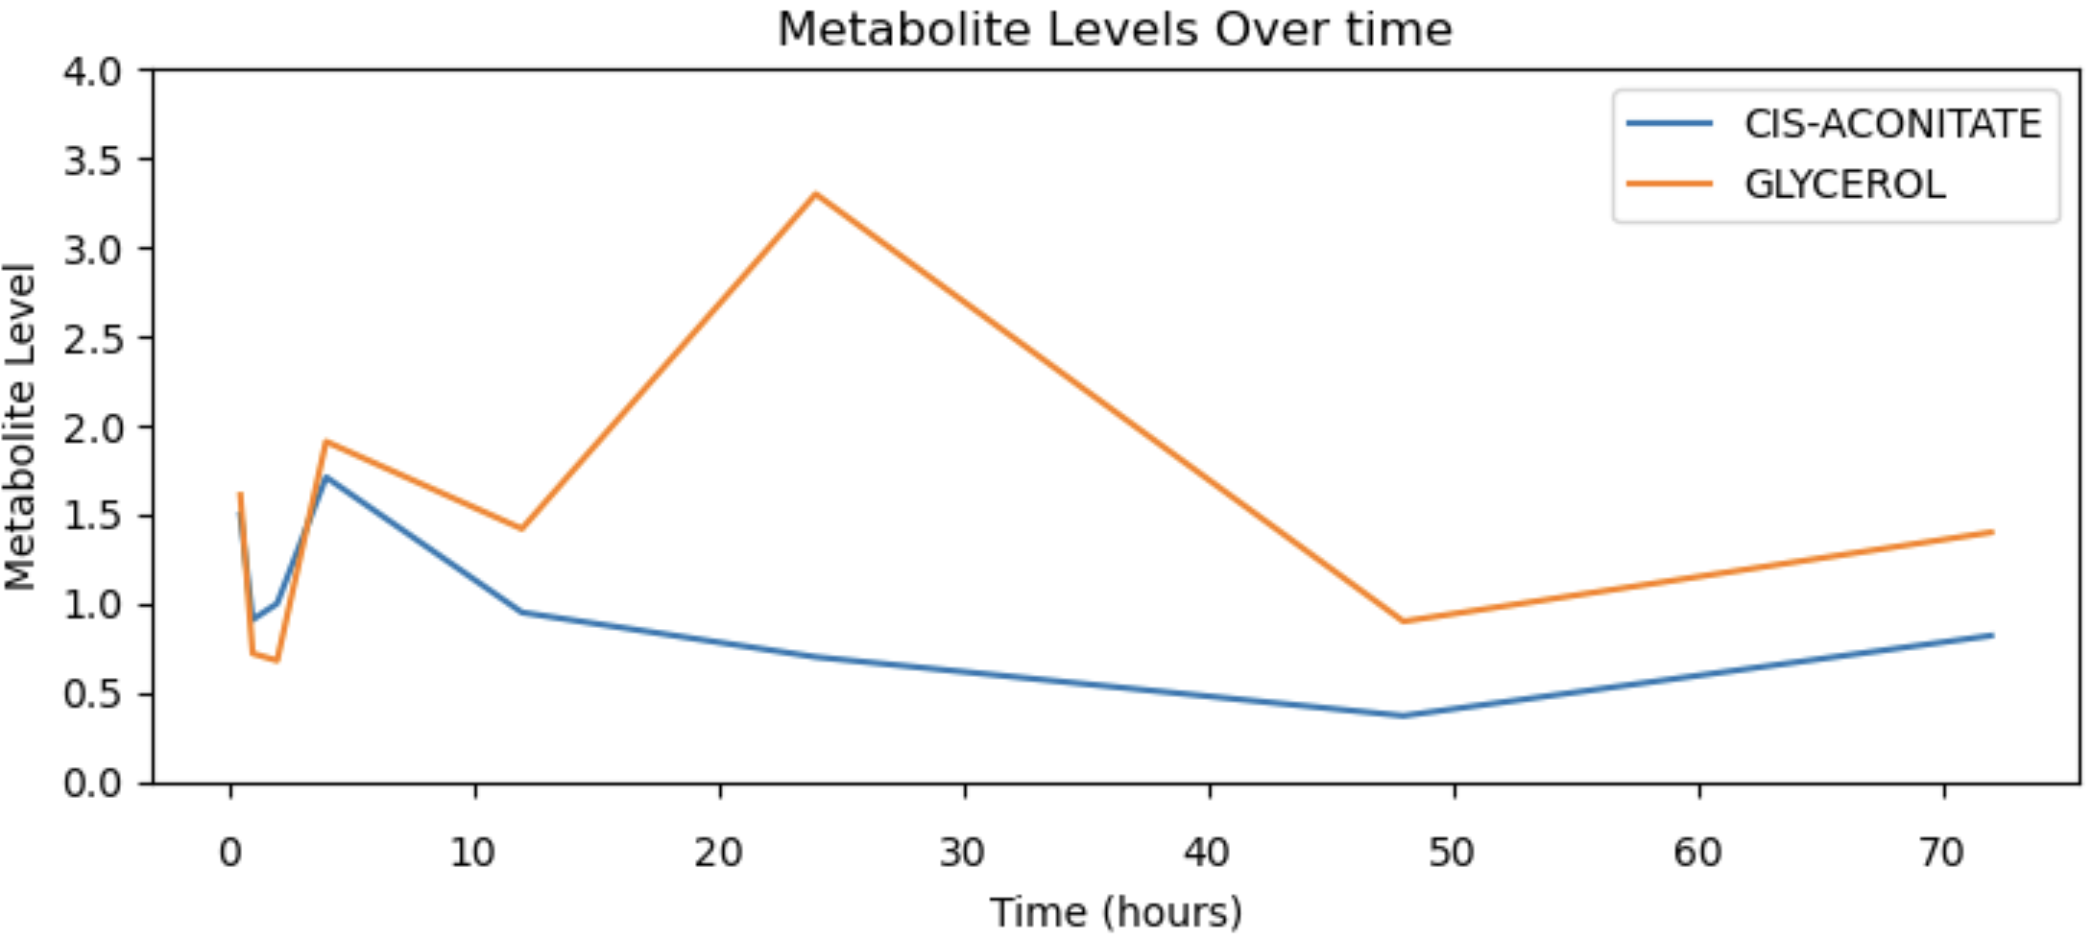

Cluster 4

Changes of direction largely consistent at key times ...

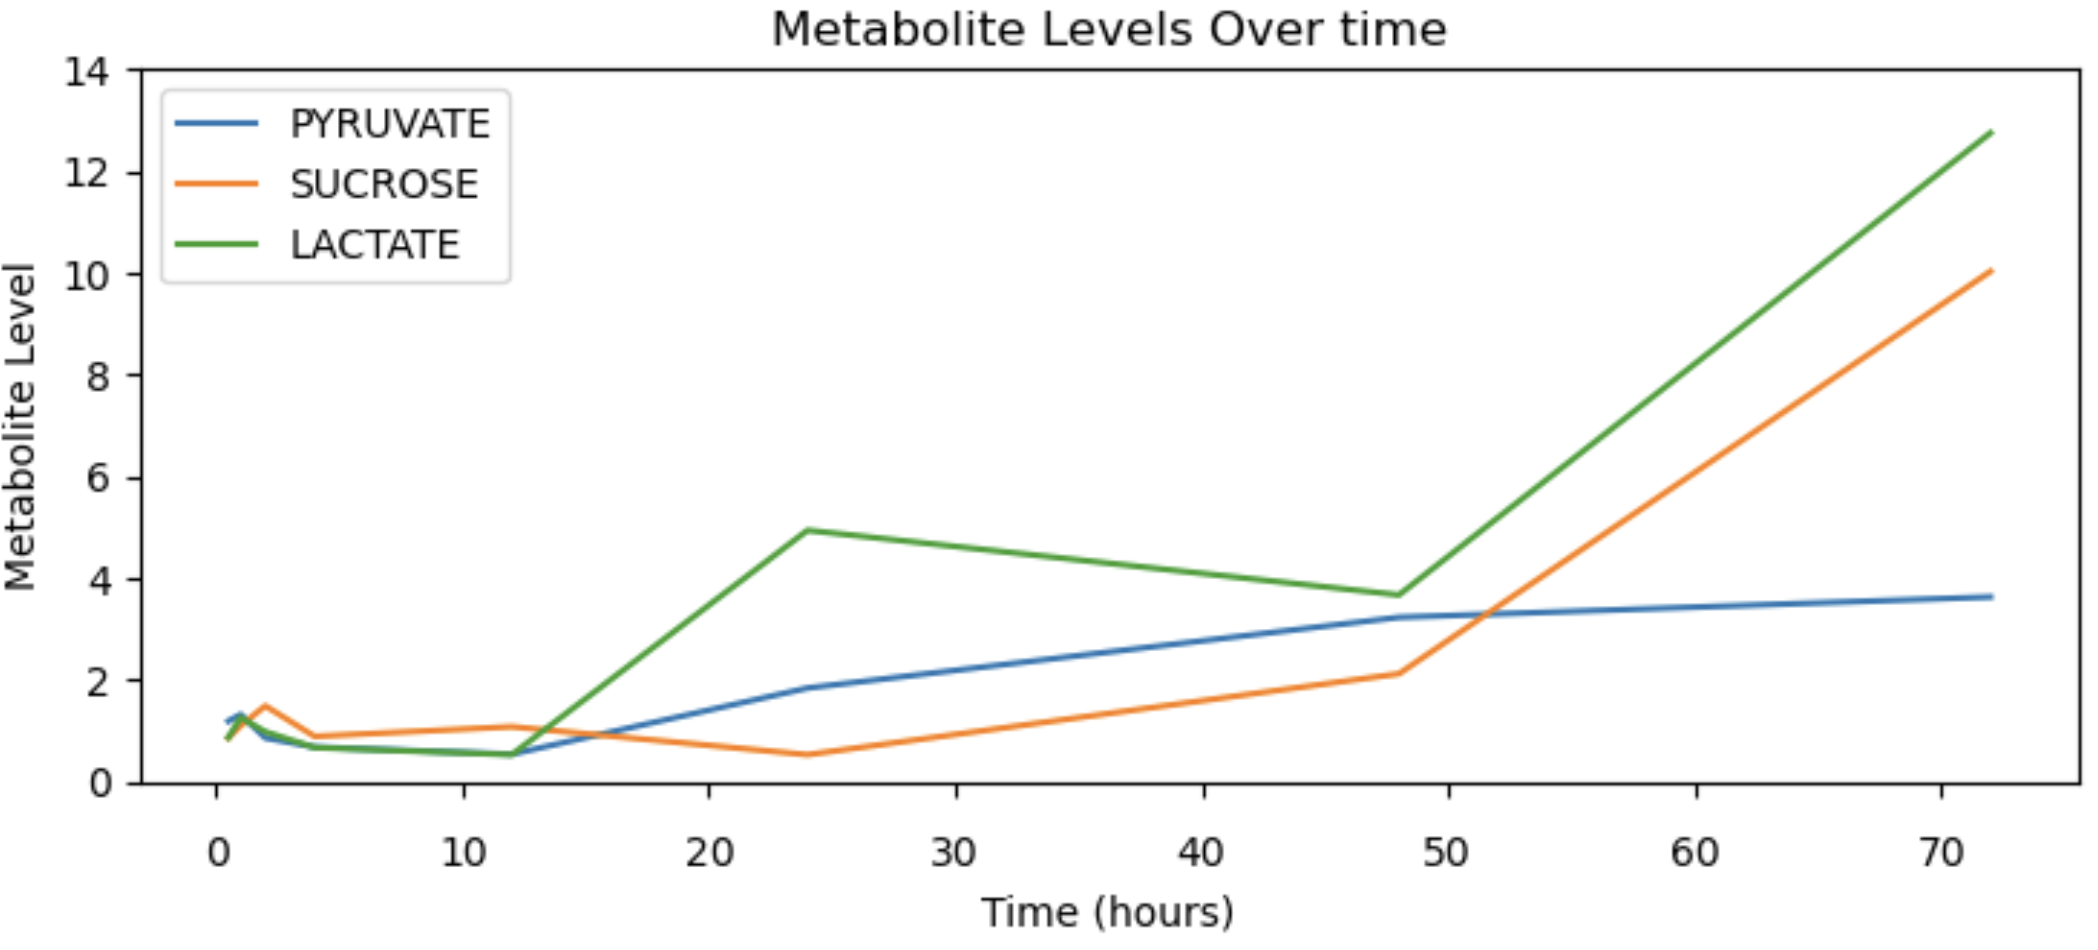

Cluster 5

Not too bad initially ... some seperation after 48 hours ...

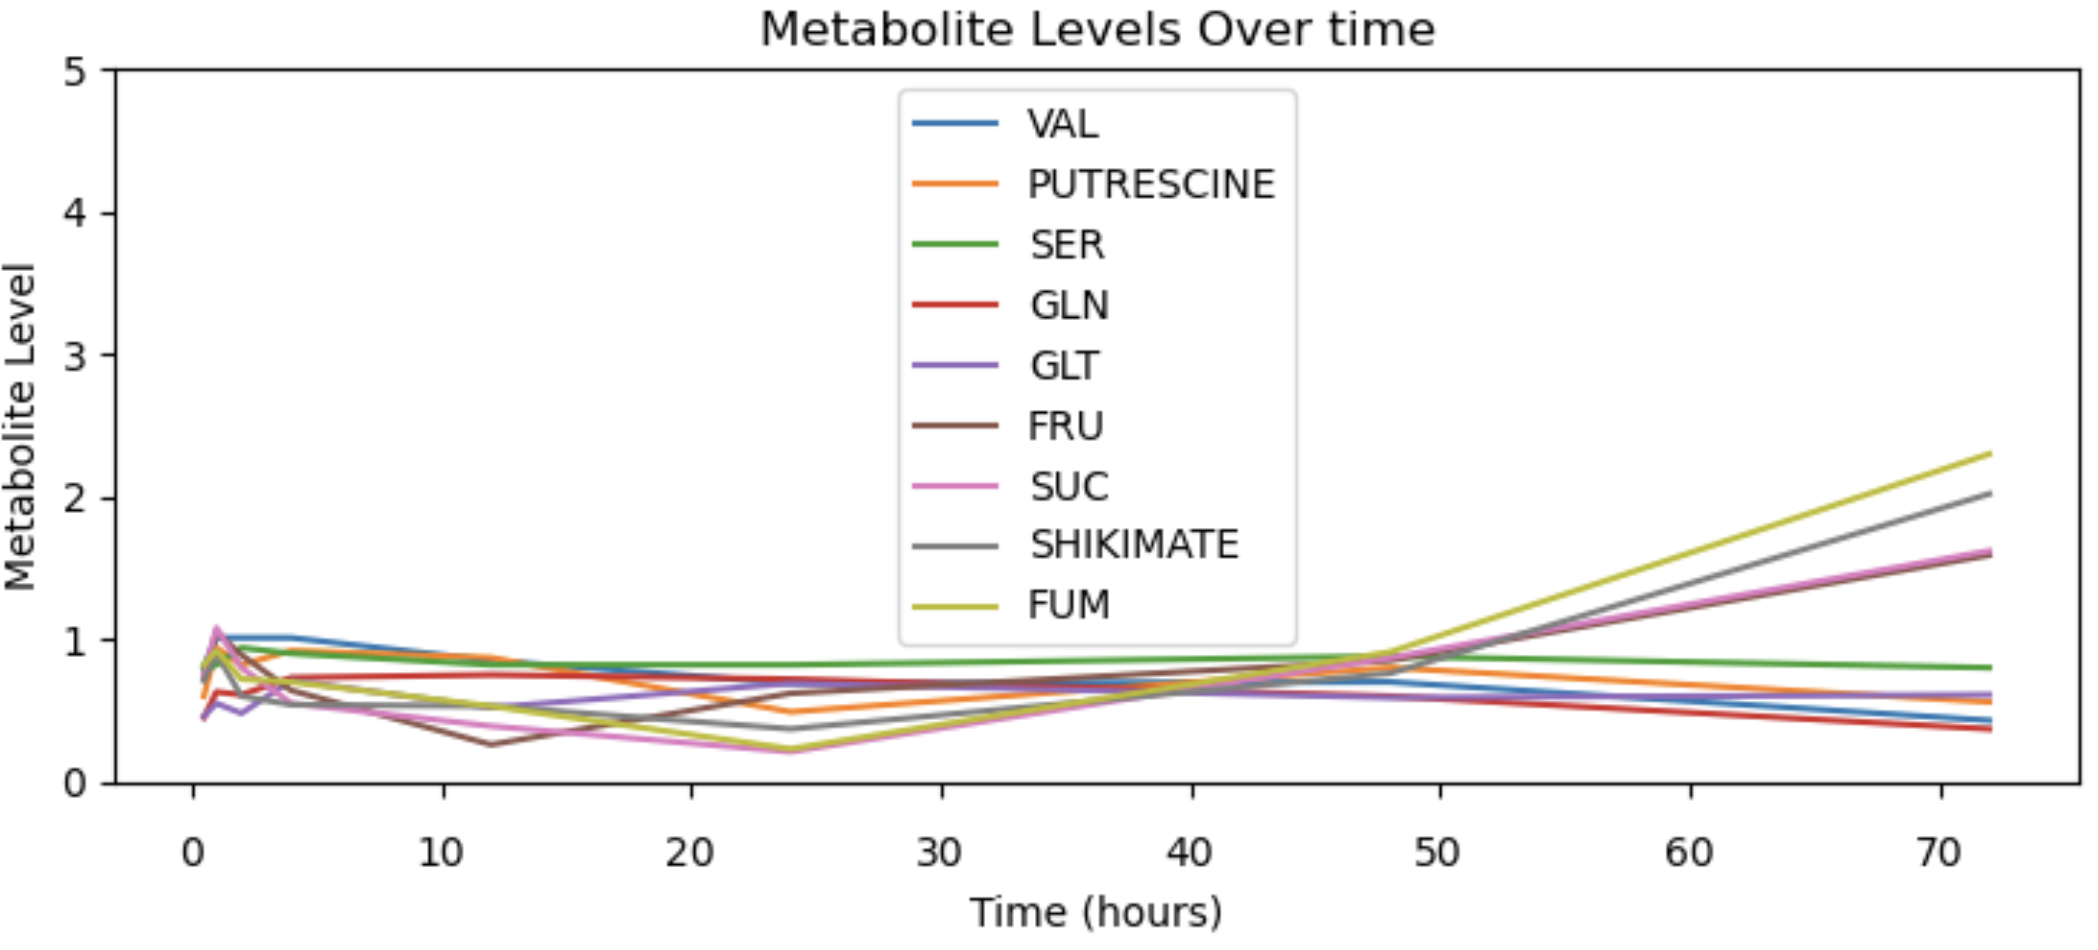

Cluster 6

Similarity looks a bit mixed after 48 hours ...

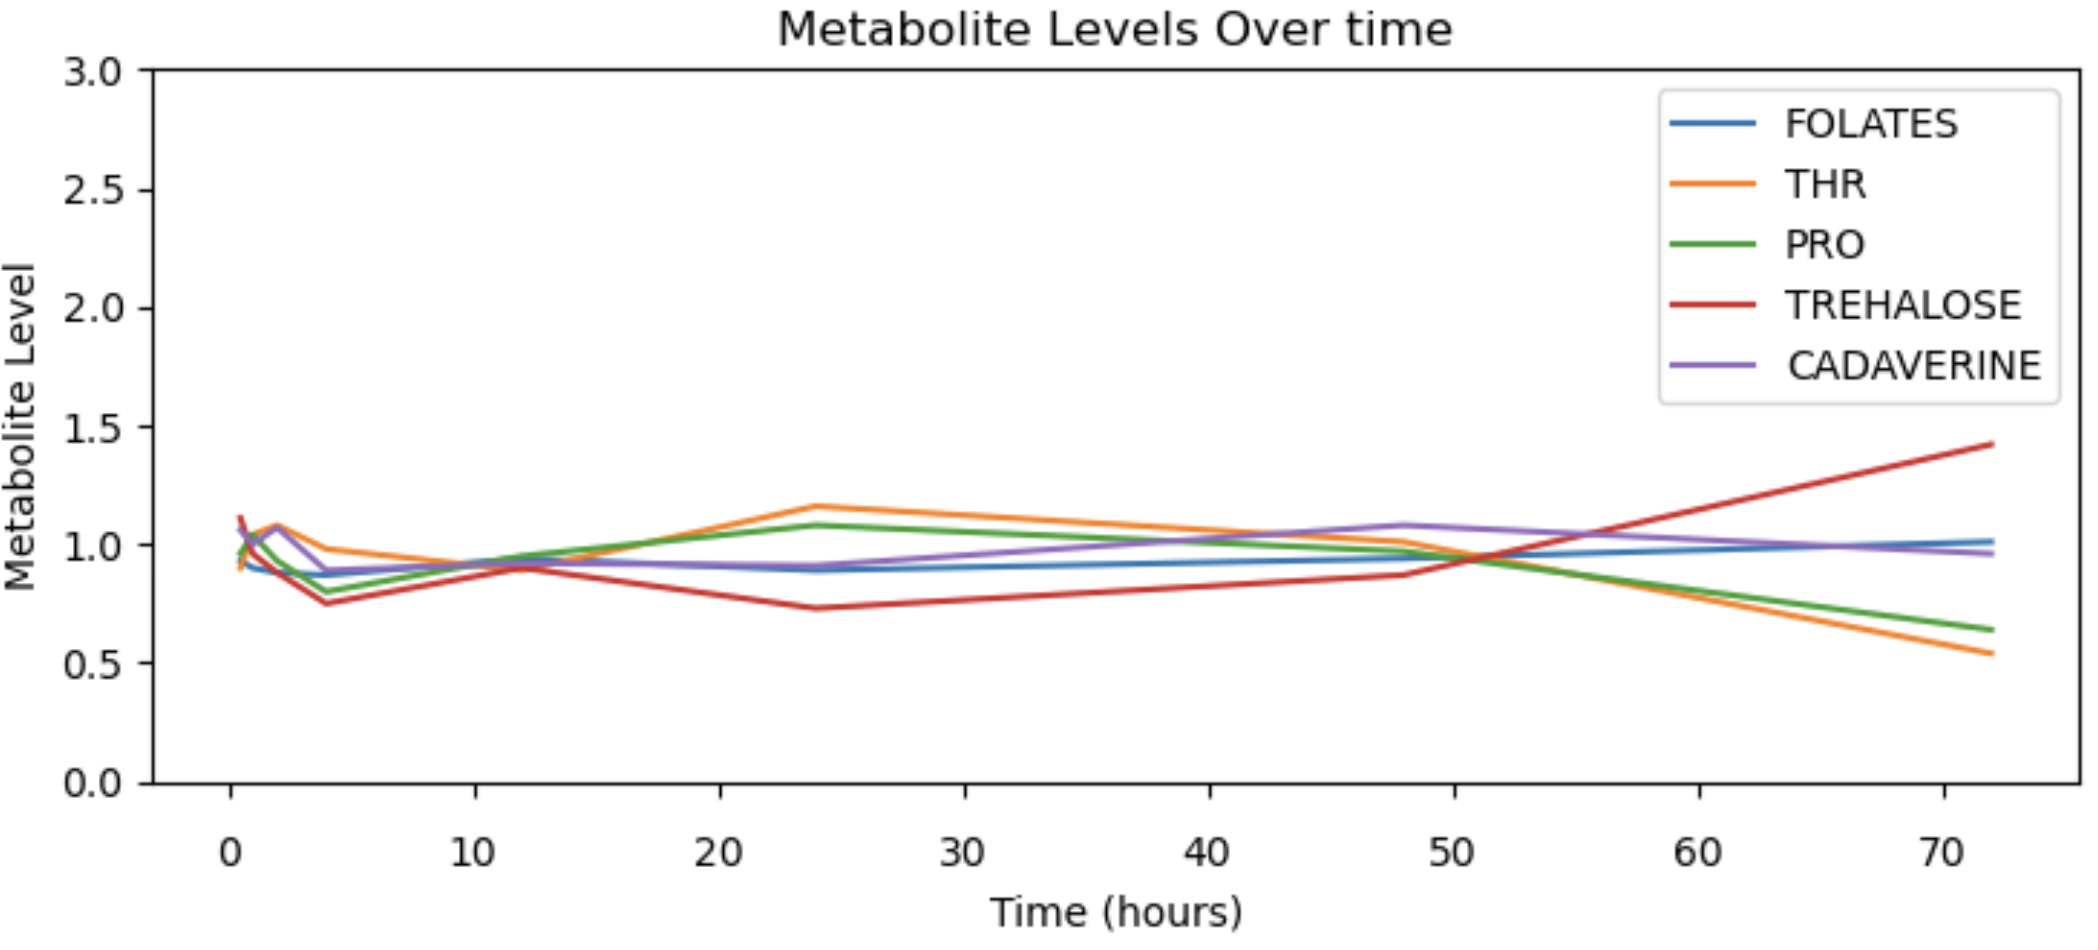

Cluster 7

Corrrelation looks good - at key time points change in direction similar

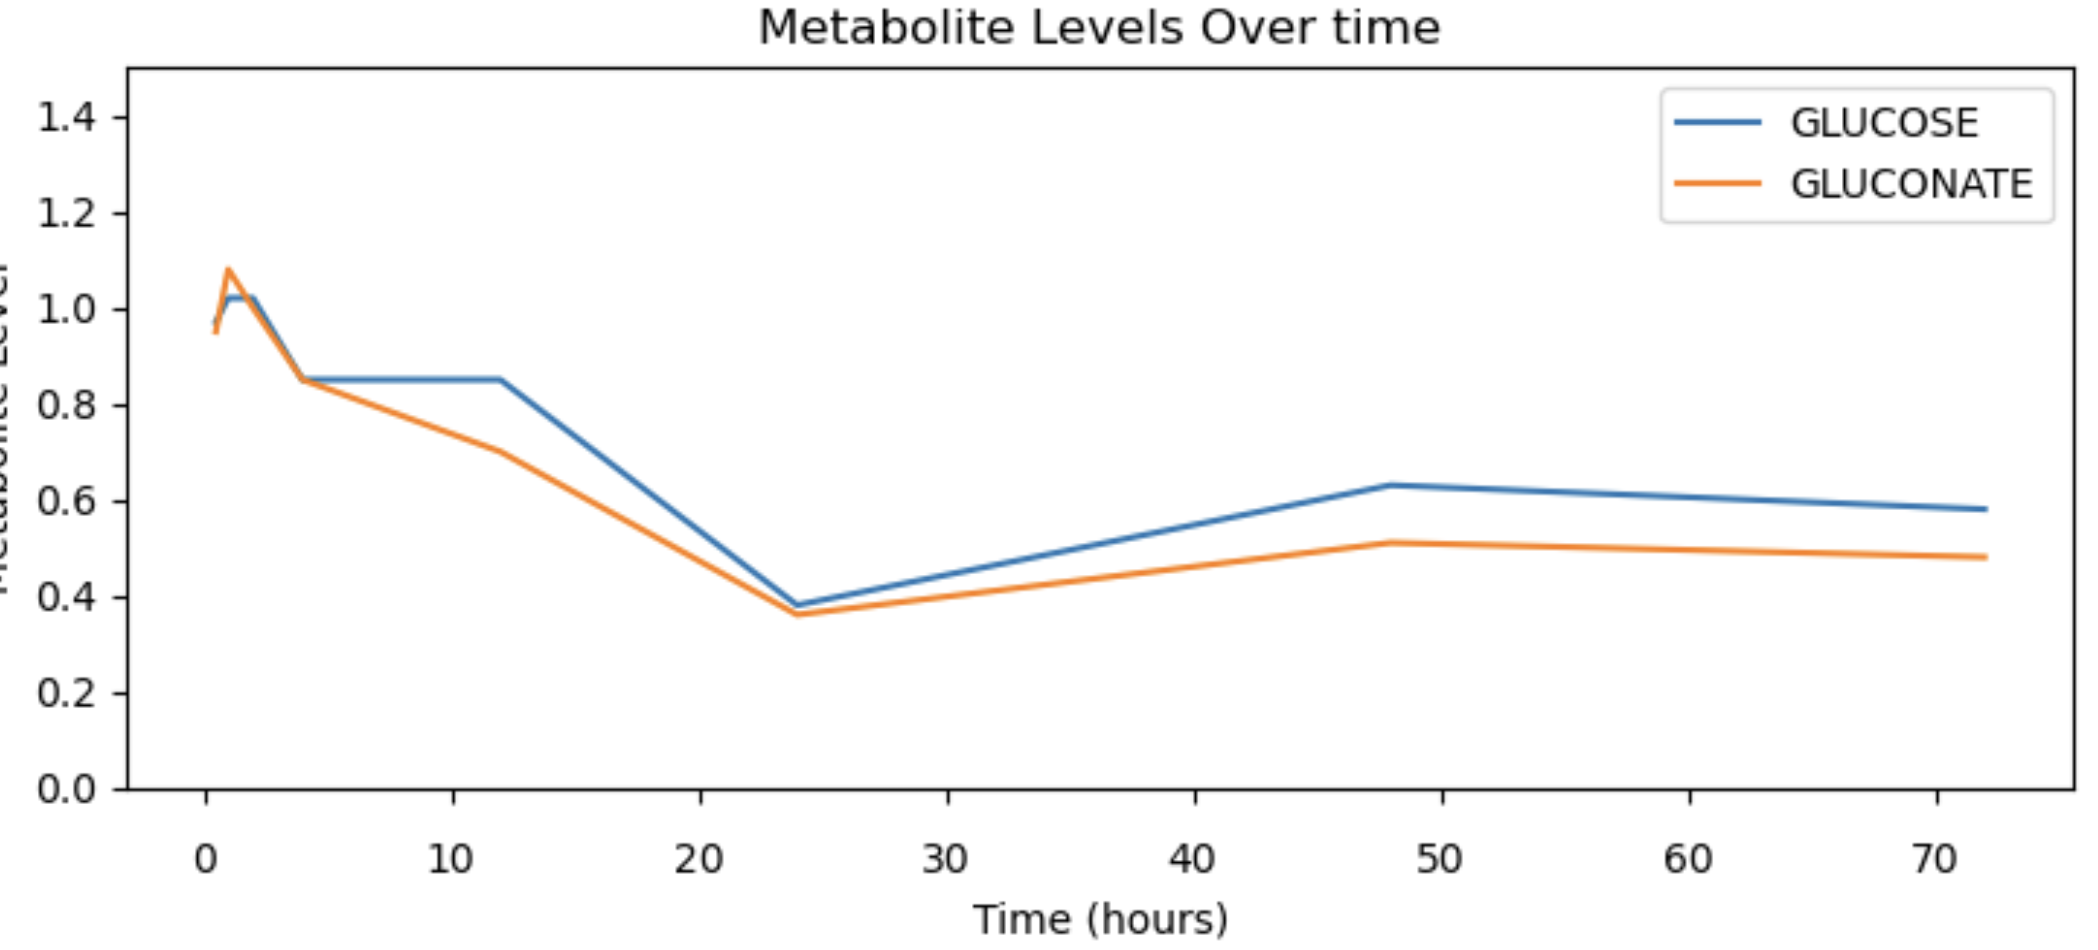

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

print(silhouette_score(data, clusters, metric='euclidean'))
#print(type(data))
#print(data)

-0.09016515095351597


Silhouette score -ve which suggests data in wrong clusters

Not sure whether clusters with just on sample results in incorrect Silhouette score?

Detailed Silhouette analysis

For n_clusters = 15 The average silhouette_score is : -0.09016515095351597
[-0.29880907  0.2024731  -0.25897293  0.22533086 -0.09459869 -0.01311519
 -0.22276468  0.25914563  0.          0.         -0.3522574  -0.12383053
 -0.13876603 -0.29670246 -0.14469622 -0.30231535 -0.1545055  -0.15146228
  0.04589507  0.13273913  0.07856016  0.         -0.08591243 -0.23642355
 -0.06285532  0.          0.         -0.69177027  0.          0.
  0.05913473  0.02064931 -0.04742925  0.27260975 -0.51880148  0.1364149
 -0.53019762 -0.52694026  0.17497769 -0.18451227  0.13293725]


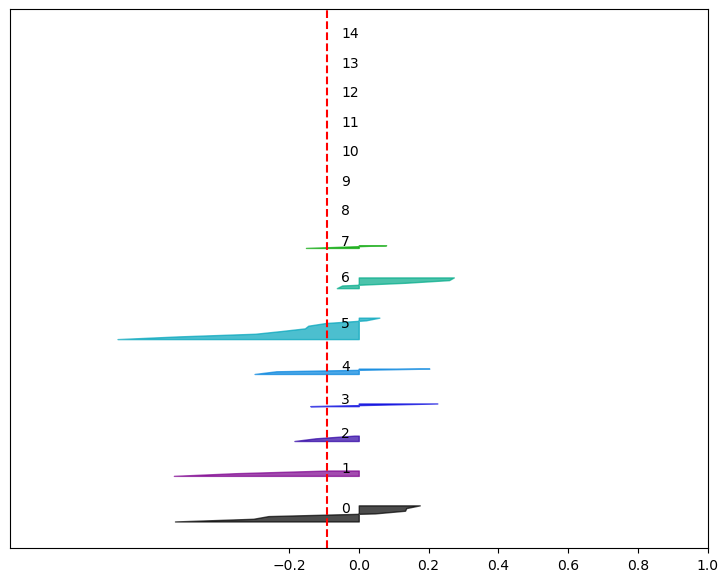

In [18]:
# Code adpated to just work with one cluster

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [15]
silhouette_avg_n_clusters = []

#scaler = StandardScaler()
sil_data = data
#sil_data_scaled = scaler.fit_transform(sil_data)


#print(sil_data_scaled)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    fig, ax1 = plt.subplots()
    fig.set_size_inches(9, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(sil_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    #clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    #cluster_labels = clusterer.fit_predict(sil_data_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(sil_data, clusters, metric='euclidean')
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(sil_data, clusters)
    print(sample_silhouette_values)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        cluster_array = np.array(clusters)
        filter = cluster_array == i
        ith_cluster_silhouette_values = sample_silhouette_values[filter]
        #ith_cluster_silhouette_values = sample_silhouette_values[i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    #ax1.set_title("The silhouette plot for the various clusters.")
    #ax1.set_xlabel("The silhouette coefficient values")
    #ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(sil_data_scaled[:, 0], sil_data_scaled[:, 1], marker='o', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    #plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
    #              "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()


#style.use("fivethirtyeight")
#plt.plot(range_n_clusters, silhouette_avg_n_clusters)
#plt.xlabel("Number of Clusters (k)")
#plt.ylabel("silhouette score")
#plt.show()

Doesn't look very good ... lots of negative data which equates to in wrong cluster

Calculate biological connectivity

In [19]:
import math

k=15

# Create array of empty lists
cluster_metabolites = np.empty(k, dtype=object)
for i in range(cluster_metabolites.shape[0]):
    cluster_metabolites[i] = []

# Populate each list with metabolites in that cluster
cluster_metabolites[0] = cluster_0
cluster_metabolites[1] = cluster_1
cluster_metabolites[2] = cluster_2
cluster_metabolites[3] = cluster_3
cluster_metabolites[4] = cluster_4

cluster_metabolites[5] = cluster_5
cluster_metabolites[6] = cluster_6
cluster_metabolites[7] = cluster_7

cluster_metabolites[8] = cluster_8
cluster_metabolites[9] = cluster_9
cluster_metabolites[10] = cluster_10
cluster_metabolites[11] = cluster_11
cluster_metabolites[12] = cluster_12
cluster_metabolites[13] = cluster_13
cluster_metabolites[14] = cluster_14

for i in range(cluster_metabolites.shape[0]):
    print(i, cluster_metabolites[i])

# Read in common pathway date file
com_paths = pd.read_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Pathways.csv")
print(com_paths.head(5))

metab_list = metabolites.tolist()
print(metab_list)

'''
x=metab_list.index('SUC')
y=metab_list.index('PYRUVATE')
print(type(x), type(y))
print(x, y)
print(com_paths.iloc[4, 1])
'''

# Calculate intermediates
bio_con_df = pd.DataFrame(columns=['cluster', 'pm', 'pmstar'])

pmdivpmstar = 0

for clust in range(0, k):
    print("Cluster = ", clust)
    metab_in_cluster = []
    metab_out_cluster = []
    for metab in metabolites:
        if (metab in cluster_metabolites[clust]):
            metab_in_cluster.append(metab)
        else:
            metab_out_cluster.append(metab)
    print(metab_in_cluster)
    print(metab_out_cluster)
    print("In length = ", len(metab_in_cluster))
    print("In cluster = ", metab_in_cluster)
    print("Out length = ", len(metab_out_cluster))
    print("Out cluster = ", metab_out_cluster)
    pm = 0
    pmstar = 0
    for x in metab_in_cluster:
        for y in metab_in_cluster:
            if (x == y):
                print("pm clash")
                continue
            metab_x = metab_list.index(x)
            metab_y = metab_list.index(y)
            pm = pm + com_paths.iloc[metab_x, metab_y+1]
            #print(x, y, metab_x, metab_y, data_df.iloc[metab_x, metab_y+1])
            #print(data_df.iloc[4, 1])
            #print("x = ", x, "y = ", y, data_df[x][y])
            #print(data_df[x], data_df[y])
            #pm = pm + 1
            #print("x = ", x, "y = ", y, "pm = ", pm)
            #print(x, y , pm)
    
    #pm = pm + 1

    for x in metab_in_cluster:
        for y in metab_out_cluster:
            if (x == y):
                print("pmstar clash")
                continue
            metab_x = metab_list.index(x)
            metab_y = metab_list.index(y)
            pmstar = pmstar + com_paths.iloc[metab_x, metab_y+1]
    
    #pmstar = pmstar + 1

    pmdivpmstar = pmdivpmstar + pm/pmstar
    #print("Cluster = ", clust, "pm = ", pm, "pmstar = ", pmstar)

    new_row = {'cluster':clust, 'pm':pm, 'pmstar':pmstar}
    bio_con_df = bio_con_df.append(new_row, ignore_index=True)

print("pmdivpmstar = ", p)
print(bio_con_df)
#print(bio_con_df['pmstar'][2])

#print(bio_con_df['pm',1)

sum = 0
for clust in range(0, k):
    if (bio_con_df['pmstar'][clust] > 0):
        sum = sum + (bio_con_df['pm'][clust] / bio_con_df['pmstar'][clust])
print(sum)

result = -math.log((1.0/k)*sum, 10)
print(result)

0 ['TRP', 'TYR', 'LYS', 'PHE', 'ETHANOL-AMINE', 'CIT', 'LEU']
1 ['CYS', 'ILE', 'URATE']
2 ['FORMATE', 'GLYCERATE', '2-KETOGLUTARATE']
3 ['CIS-ACONITATE', 'GLYCEROL']
4 ['PYRUVATE', 'SUCROSE', 'LACTATE']
5 ['VAL', 'PUTRESCINE', 'SER', 'GLN', 'GLT', 'FRU', 'SUC', 'SHIKIMATE', 'FUM']
6 ['FOLATES', 'THR', 'PRO', 'TREHALOSE', 'CADAVERINE']
7 ['GLUCOSE', 'GLUCONATE']
8 ['CPD0-1083']
9 ['GLY']
10 ['ASN']
11 ['MAL']
12 ['L-ASPARTATE']
13 ['4-AMINO-BUTYRATE']
14 ['L-ALPHA-ALANINE']
      Unnamed: 0  PYRUVATE  LACTATE  ETHANOL-AMINE  GLYCEROL  SUC  GLYCERATE  \
0       PYRUVATE         0        0              0         0    5          1   
1        LACTATE         0        0              0         0    0          0   
2  ETHANOL-AMINE         0        0              0         0    0          0   
3       GLYCEROL         0        0              0         0    0          0   
4            SUC         5        0              0         0    0          0   

   FUM  CADAVERINE  MAL  ...  GLN  THR  P

/var/folders/s5/5rt4m34s5b9gmg32fzqdhqyc0000gn/T/ipykernel_23287/2698969123.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bio_con_df = bio_con_df.append(new_row, ignore_index=True)
/var/folders/s5/5rt4m34s5b9gmg32fzqdhqyc0000gn/T/ipykernel_23287/2698969123.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bio_con_df = bio_con_df.append(new_row, ignore_index=True)
/var/folders/s5/5rt4m34s5b9gmg32fzqdhqyc0000gn/T/ipykernel_23287/2698969123.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bio_con_df = bio_con_df.append(new_row, ignore_index=True)
/var/folders/s5/5rt4m34s5b9gmg32fzqdhqyc0000gn/T/ipykernel_23287/2698969123.py:102: FutureWarning: The frame.append method is deprecated and will be removed from pand

In [20]:
import math

k=3

cluster_0 = ['PYRUVATE', 'LACTATE', 'SUCROSE']
cluster_1 =['SUC', 'GLYCERATE', 'FUM', 'CADAVERINE', 'MAL', '4-AMINO-BUTYRATE', 'CYS', '2-KETOGLUTARATE', \
            'PUTRESCINE', 'SHIKIMATE', 'FRU', 'GLUCOSE', 'GLUCONATE', 'CPD0-1083', 'URATE', 'TREHALOSE', 'L-ASPARTATE', \
            'ASN', 'SER', 'GLY', 'L-ALPHA-ALANINE', 'GLT', 'GLN', 'THR', 'PRO', 'VAL', 'ILE', 'FORMATE', 'FOLATES']
cluster_2 = ['ETHANOL-AMINE', 'GLYCEROL', 'CIS-ACONITATE', 'CIT', 'LYS', 'TYR', 'TRP', 'LEU', 'PHE']

# Create array of empty lists
cluster_metabolites = np.empty(k, dtype=object)
for i in range(cluster_metabolites.shape[0]):
    cluster_metabolites[i] = []

clusters = []

for metab in (range(0, len(metabolites))):
    if metabolites[metab] in cluster_0:
        clusters.append(0)
    if metabolites[metab] in cluster_1:
        clusters.append(1)
    if metabolites[metab] in cluster_2:
        clusters.append(2)
    if metabolites[metab] in cluster_3:
        clusters.append(3)

print(clusters)
print(len(clusters))

# Read in common pathway date file
com_paths = pd.read_csv("./Data/Arabidopsis-T87-timeseries-NaCl-by-metabolite-BioCyc-Master-Common-Pathways.csv")
print(com_paths.head(5))

metab_list = metabolites.tolist()
print(metab_list)
x=metab_list.index('SUC')
y=metab_list.index('PYRUVATE')
print(type(x), type(y))
print(x, y)
print(com_paths.iloc[4, 1])

# Calculate intermediates
bio_con_df = pd.DataFrame(columns=['cluster', 'pm', 'pmstar'])

pmdivpmstar = 0

for clust in range(0, k):
    print("Cluster = ", clust)
    metab_in_cluster = []
    metab_out_cluster = []
    for metab in metabolites:
        if (metab in cluster_metabolites[clust]):
            metab_in_cluster.append(metab)
        else:
            metab_out_cluster.append(metab)
    print("In length = ", len(metab_in_cluster))
    print("In cluster = ", metab_in_cluster)
    print("Out length = ", len(metab_out_cluster))
    print("Out cluster = ", metab_out_cluster)
    pm = 0
    pmstar = 0
    for x in metab_in_cluster:
        for y in metab_in_cluster:
            if (x == y):
                continue
            metab_x = metab_list.index(x)
            metab_y = metab_list.index(y)
            pm = pm + com_paths.iloc[metab_x, metab_y+1]
            #print(x, y, metab_x, metab_y, data_df.iloc[metab_x, metab_y+1])
            #print(data_df.iloc[4, 1])
            #print("x = ", x, "y = ", y, data_df[x][y])
            #print(data_df[x], data_df[y])
            #pm = pm + 1
            #print("x = ", x, "y = ", y, "pm = ", pm)
            #print(x, y , pm)
    
    pm = pm + 1

    for x in metab_in_cluster:
        for y in metab_out_cluster:
            if (x == y):
                continue
            metab_x = metab_list.index(x)
            metab_y = metab_list.index(y)
            pmstar = pmstar + com_paths.iloc[metab_x, metab_y+1]
    
    pmstar = pmstar + 1

    pmdivpmstar = pmdivpmstar + pm/pmstar
    #print("Cluster = ", clust, "pm = ", pm, "pmstar = ", pmstar)

    new_row = {'cluster':clust, 'pm':pm, 'pmstar':pmstar}
    bio_con_df = bio_con_df.append(new_row, ignore_index=True)

print("pmdivpmstar = ", p)
print(bio_con_df)
#print(bio_con_df['pmstar'][2])

#print(bio_con_df['pm',1)

sum = 0
for clust in range(0, k):
    if (bio_con_df['pmstar'][clust] > 0):
        sum = sum + (bio_con_df['pm'][clust] / bio_con_df['pmstar'][clust])
print(sum)

result = -math.log((1.0/k)*pmdivpmstar, 10)
print(result)

[0, 0, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1]
43
      Unnamed: 0  PYRUVATE  LACTATE  ETHANOL-AMINE  GLYCEROL  SUC  GLYCERATE  \
0       PYRUVATE         0        0              0         0    5          1   
1        LACTATE         0        0              0         0    0          0   
2  ETHANOL-AMINE         0        0              0         0    0          0   
3       GLYCEROL         0        0              0         0    0          0   
4            SUC         5        0              0         0    0          0   

   FUM  CADAVERINE  MAL  ...  GLN  THR  PRO  VAL  TRP  ILE  LEU  PHE  FORMATE  \
0    2           0    4  ...    6    4    0    2    4    3    1    3        2   
1    0           0    0  ...    0    0    0    0    0    0    0    0        0   
2    0           0    0  ...    0    0    0    0    0    0    0    0        0   
3    0           0    0  ...    0    0    0    0    0    0    

/var/folders/s5/5rt4m34s5b9gmg32fzqdhqyc0000gn/T/ipykernel_23287/2115016797.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bio_con_df = bio_con_df.append(new_row, ignore_index=True)
/var/folders/s5/5rt4m34s5b9gmg32fzqdhqyc0000gn/T/ipykernel_23287/2115016797.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bio_con_df = bio_con_df.append(new_row, ignore_index=True)
/var/folders/s5/5rt4m34s5b9gmg32fzqdhqyc0000gn/T/ipykernel_23287/2115016797.py:94: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bio_con_df = bio_con_df.append(new_row, ignore_index=True)


In [21]:
range_n_clusters = [4] # Set number of clusters identified manually
silhouette_avg_n_clusters = []